## Test d'hypothèse 1 : vérification des canaux de couleur de différents types de documents

Ce test à pour but de savoir s'il est possible de différencier les documents par leurs canaux de couleur (RGB).

In [1]:
!pwd
!ls

/Users/cyrilleedzang/Documents/Formations/greta-Python/notes_de_cours/workplace/card-data
BID Dataset.zip        BID_Dataset.docx       ~$D_Dataset.docx
BID-Dataset            test-1_verif_rgb.ipynb


In [2]:
!ls BID-Dataset/

CNH_Aberta  CNH_Verso   CPF_Verso   RG_Recto    desktop.ini
CNH_Recto   CPF_Recto   RG_Aberto   RG_Verso


In [ ]:
#!pip install opencv-contrib-python

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# on saisie les premières images .jpg de chaque répertoire 

cpf_recto = cv2.imread('BID-Dataset/CPF_Recto/00010892_in.jpg')
cpf_verso = cv2.imread('BID-Dataset/CPF_Verso/00014698_in.jpg')
rg_recto = cv2.imread('BID-Dataset/RG_Recto/00022188_in.jpg')
rg_verso = cv2.imread('BID-Dataset/RG_Verso/00025928_in.jpg')
cnh_recto = cv2.imread('BID-Dataset/CNH_Recto/00003604_in.jpg')
cnh_verso = cv2.imread('BID-Dataset/CNH_Verso/00007256_in.jpg')

In [5]:
# Conversion d'images de BGR en RGB (pour afficher les images en couleur normale)
cpf_recto = cv2.cvtColor(cpf_recto, cv2.COLOR_BGR2RGB)
cpf_verso = cv2.cvtColor(cpf_verso, cv2.COLOR_BGR2RGB)
rg_recto = cv2.cvtColor(rg_recto, cv2.COLOR_BGR2RGB)
rg_verso = cv2.cvtColor(rg_verso, cv2.COLOR_BGR2RGB)
cnh_recto = cv2.cvtColor(cnh_recto, cv2.COLOR_BGR2RGB)
cnh_verso = cv2.cvtColor(cnh_verso, cv2.COLOR_BGR2RGB)

In [ ]:
help(cv2.cvtColor)

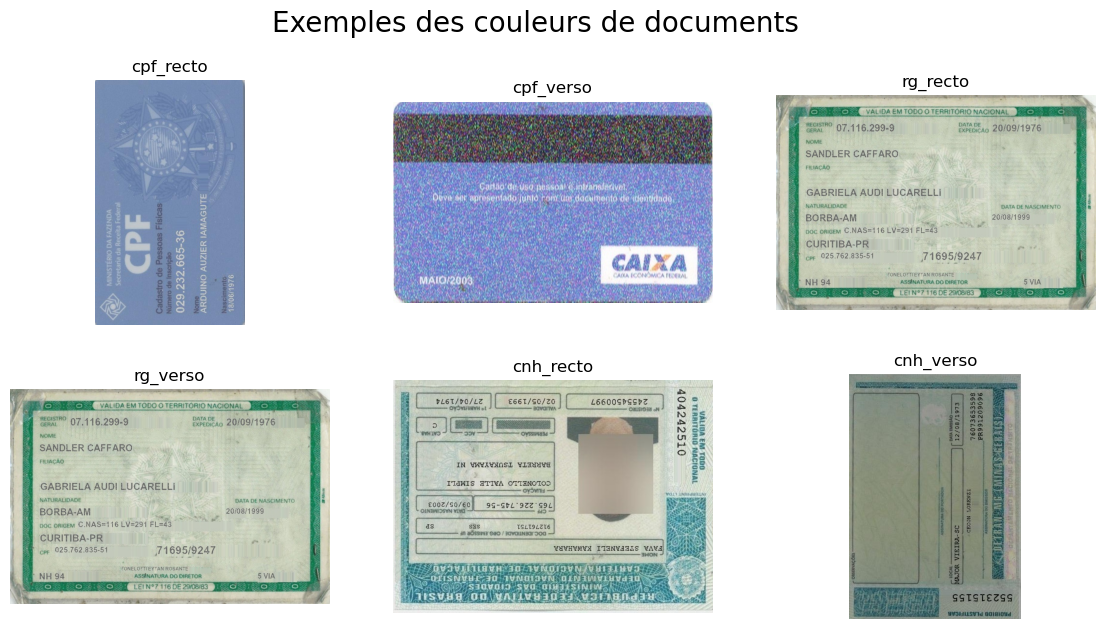

In [6]:
# tracer les échantillons
fig = plt.figure(figsize=(14,7))

fig.add_subplot(2,3,1); plt.axis('off')
plt.title('cpf_recto')
plt.imshow(cpf_recto)

fig.add_subplot(2,3,2); plt.axis('off')
plt.title('cpf_verso')
plt.imshow(cpf_verso)

fig.add_subplot(2,3,3); plt.axis('off')
plt.title('rg_recto')
plt.imshow(rg_verso)

fig.add_subplot(2,3,4); plt.axis('off')
plt.title('rg_verso')
plt.imshow(rg_verso)

fig.add_subplot(2,3,5); plt.axis('off')
plt.title('cnh_recto')
plt.imshow(cnh_recto)

fig.add_subplot(2,3,6); plt.axis('off')
plt.title('cnh_verso')
plt.imshow(cnh_verso)

fig.suptitle('Exemples des couleurs de documents', fontsize=20)
plt.show();

# 2. Canaux de couleur d'une image

In [7]:
hist_red = cv2.calcHist(cpf_verso,[0],None,[256],[0,256]) #-- étendue des valeurs Blues 
hist_green = cv2.calcHist(cpf_verso,[1],None,[256],[0,256]) #-- étendue des valeurs Green
hist_blue = cv2.calcHist(cpf_verso,[2],None,[256],[0,256]) #-- étendue des valeurs Red
hist = cv2.calcHist(cpf_verso,[0],None,[256],[0,256])

In [ ]:
help(cv2.calcHist)

In [8]:
plt.style.use('ggplot')

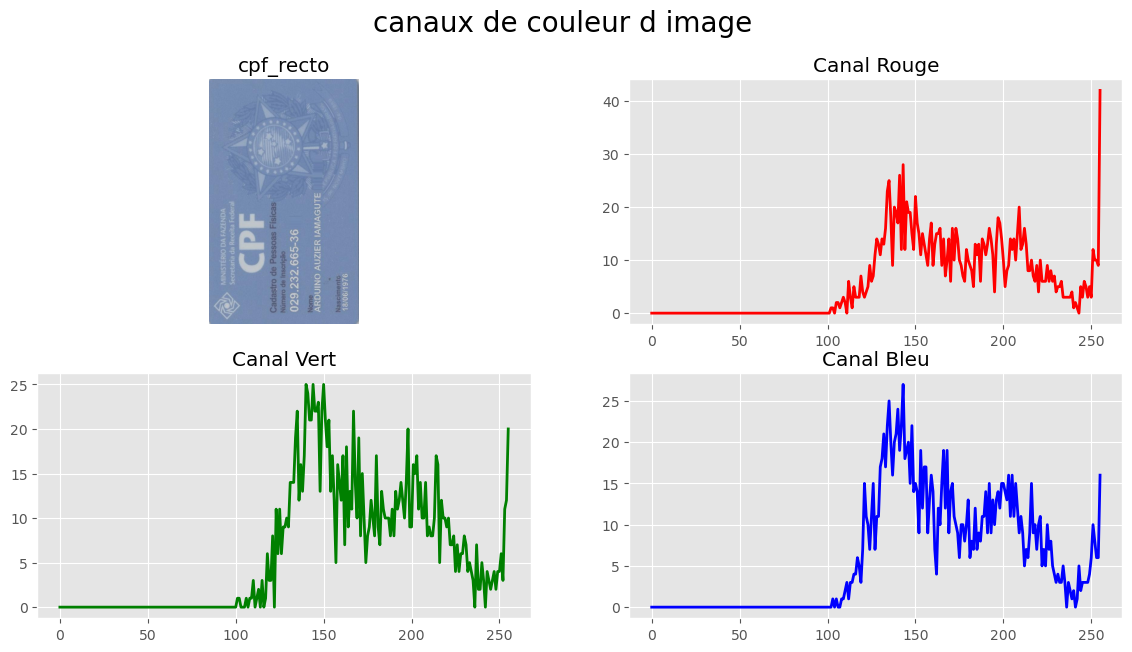

In [9]:
#pour une image donnée on va afficher le graphe de répartition pour chaque couleur sur l'étendu de l'image

fig = plt.figure(figsize=(14,7))

fig.add_subplot(2,2,1); plt.axis('off')
plt.title('cpf_recto')
plt.imshow(cpf_recto)

fig.add_subplot(2,2,2);
plt.title('Canal Rouge')
plt.plot(hist_red,color='red',lw=2)

fig.add_subplot(2,2,3);
plt.title('Canal Vert')
plt.plot(hist_green,color='green',lw=2)

fig.add_subplot(2,2,4);
plt.title('Canal Bleu')
plt.plot(hist_blue,color='blue',lw=2)

fig.suptitle('canaux de couleur d image', fontsize=20)
plt.show();

# Comparaison des canaux de couleur du document

In [10]:
# pour chaque image on associe une matrice
documents = {
    'cpf_recto' : {'matrice' : cpf_recto},
    'cpf_verso' : {'matrice' : cpf_verso},
    'rg_recto' : {'matrice' : rg_recto},
    'rg_verso' : {'matrice' : rg_verso},
    'cnh_recto' : {'matrice' : cnh_recto},
    'cnh_verso' : {'matrice' : cnh_verso}
}

In [11]:
for key, value in documents.items():
    documents[key]['hist_red'] = cv2.calcHist(documents[key]['matrice'],[0],None,[256],[0,256])
    documents[key]['hist_green'] = cv2.calcHist(documents[key]['matrice'],[1],None,[256],[0,256])
    documents[key]['hist_blue'] = cv2.calcHist(documents[key]['matrice'],[2],None,[256],[0,256])

In [12]:
documents['cpf_recto'].keys()

dict_keys(['matrice', 'hist_red', 'hist_green', 'hist_blue'])

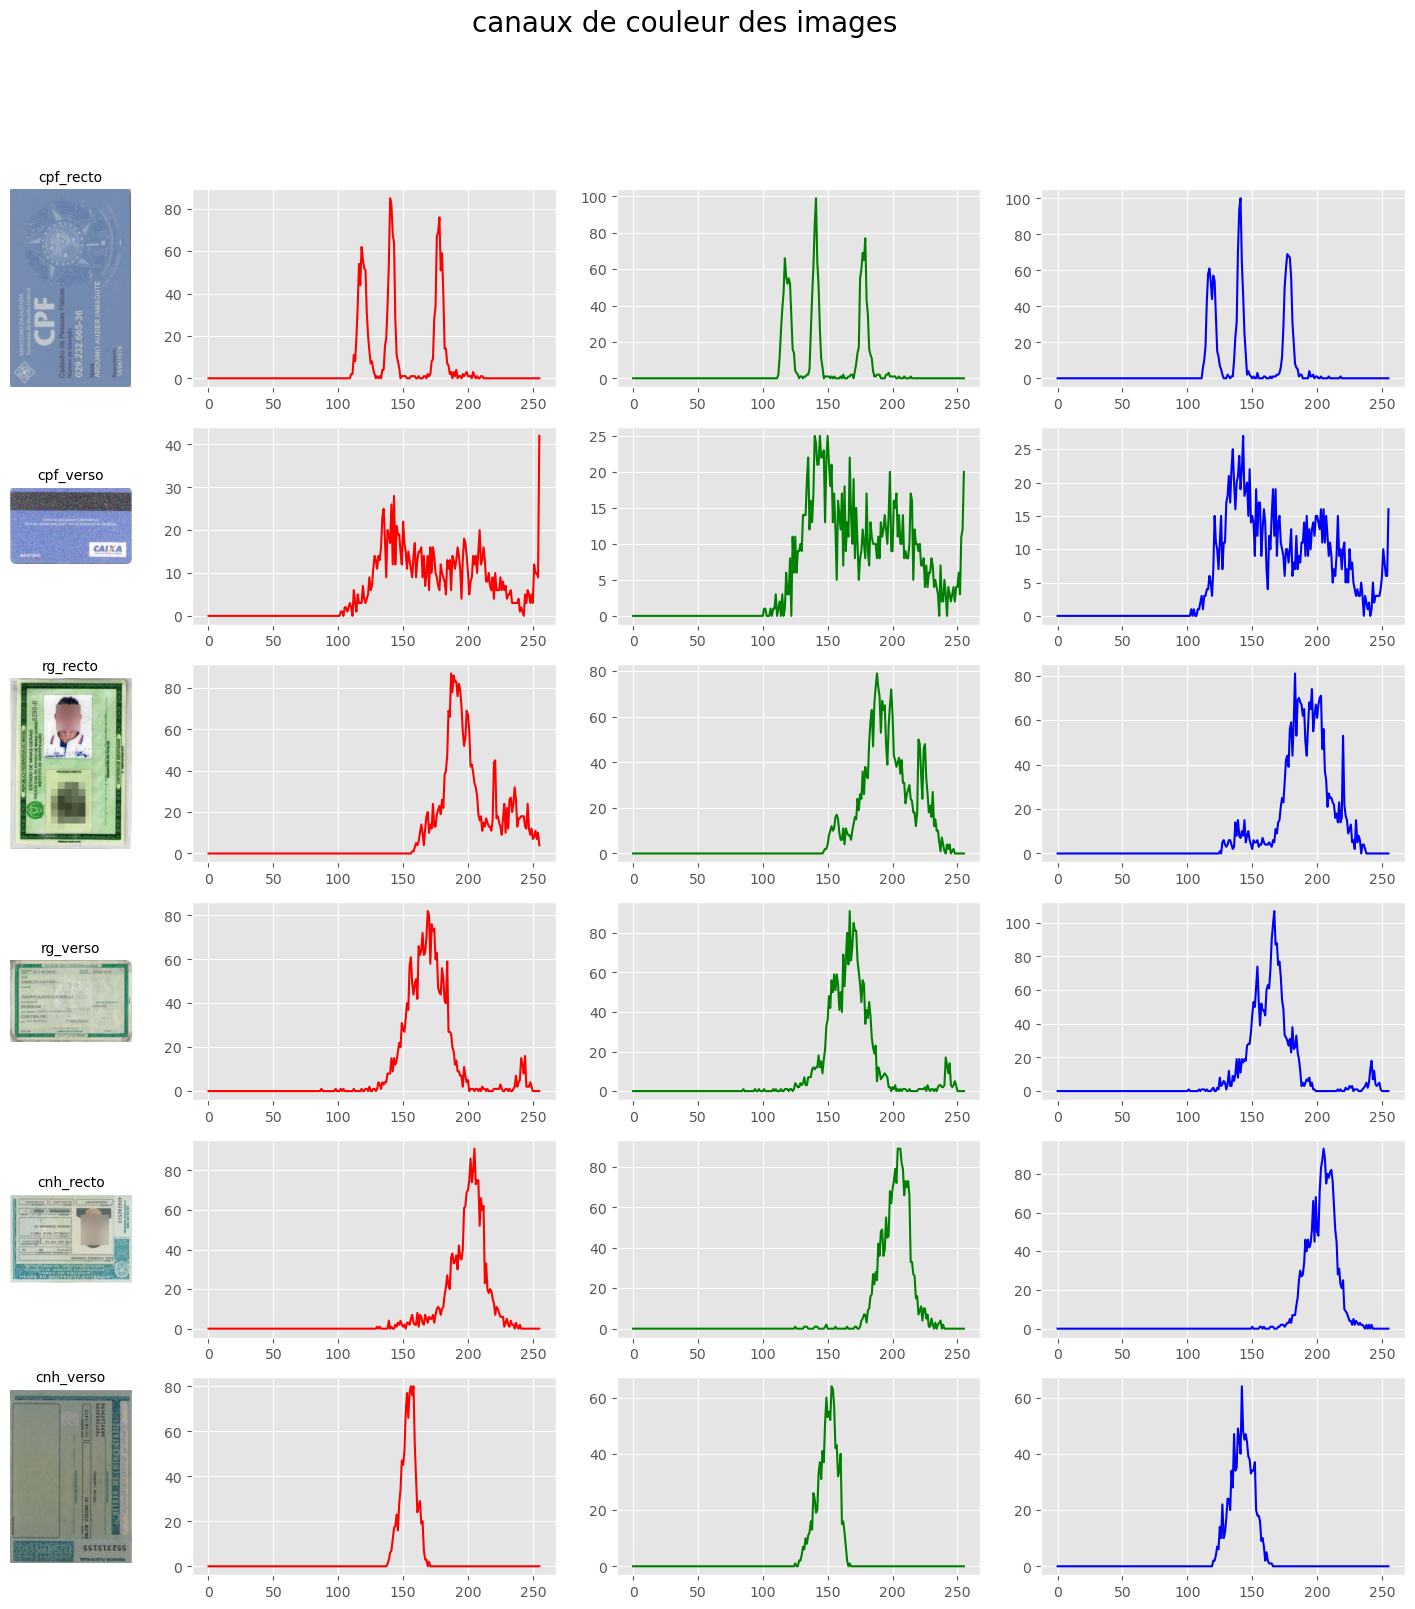

In [13]:
n = len(documents.keys())
fig , ax = plt.subplots(6, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in documents.items():
    ax[0+(cont)].imshow(value['matrice']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[6+(cont)].plot(value['hist_red'], color='red');
    ax[12+(cont)].plot(value['hist_green'], color='green')
    ax[18+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('canaux de couleur des images', fontsize=20)
plt.show()

En comparant les moyennes des histogrammes des bons et des mauvais échantillons, nous pouvons voir que les deux sont très séparables et que les histogrammes des échantillons sombres ont un motif de concentration des histogrammes au centre. Nous voyons donc une fois de plus la nécessité d'appliquer un prétraitement à ces échantillons, ainsi que d'identifier quand effectuer ce prétraitement.

## 4. Comparaison des canaux de couleur d'un même document avec des tons différents

## 4.1 Rg_recto

In [19]:
rg_recto_v = {}
rg_recto_v['00022188'] = {'matrice':cv2.cvtColor(cv2.imread('BID-Dataset/RG_Recto/00022188_in.jpg'), cv2.COLOR_BGR2RGB)}
rg_recto_v['00022189'] = {'matrice':cv2.cvtColor(cv2.imread('BID-Dataset/RG_Recto/00022189_in.jpg'), cv2.COLOR_BGR2RGB)}
rg_recto_v['00022190'] = {'matrice':cv2.cvtColor(cv2.imread('BID-Dataset/RG_Recto/00022190_in.jpg'), cv2.COLOR_BGR2RGB)}
rg_recto_v['00022191'] = {'matrice':cv2.cvtColor(cv2.imread('BID-Dataset/RG_Recto/00022191_in.jpg'), cv2.COLOR_BGR2RGB)}

In [20]:
for key, value in rg_recto_v.items():
    rg_recto_v[key]['hist_red'] = cv2.calcHist(rg_recto_v[key]['matrice'],[0],None,[256],[0,256])
    rg_recto_v[key]['hist_green'] = cv2.calcHist(rg_recto_v[key]['matrice'],[1],None,[256],[0,256])
    rg_recto_v[key]['hist_blue'] = cv2.calcHist(rg_recto_v[key]['matrice'],[2],None,[256],[0,256])

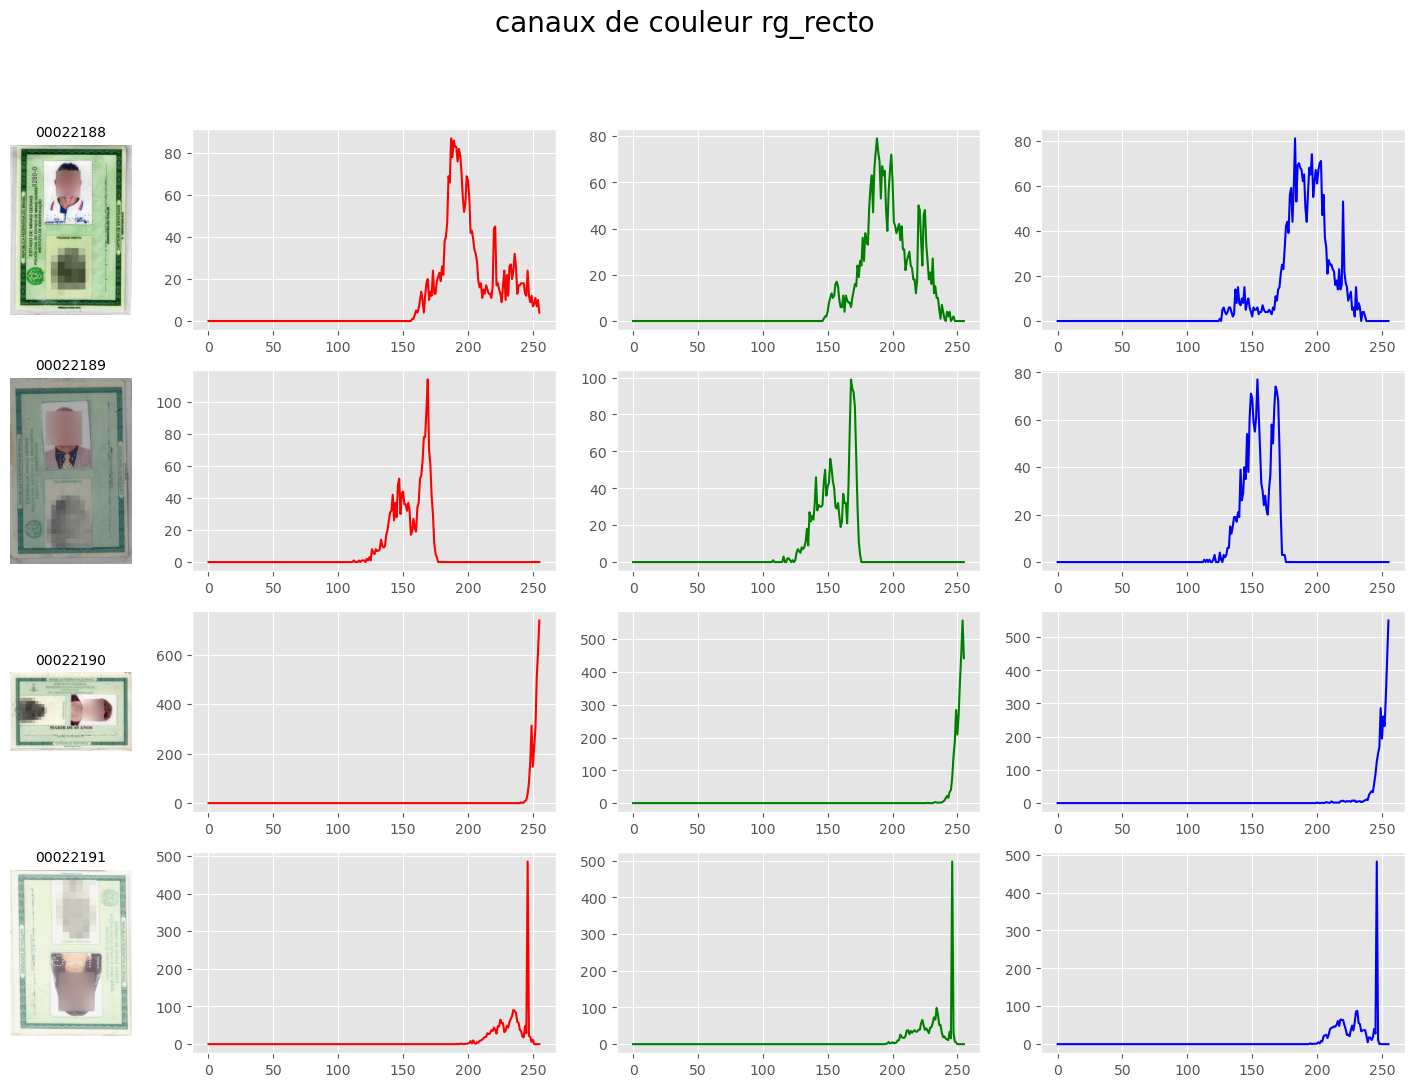

In [21]:
n = len(rg_recto_v.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in rg_recto_v.items():
    ax[0+(cont)].imshow(value['matrice']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[n+(cont)].plot(value['hist_red'], color='red');
    ax[n*2+(cont)].plot(value['hist_green'], color='green')
    ax[n*3+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('canaux de couleur rg_recto', fontsize=20)
plt.show()

## 4.2 Cnh_recto

In [22]:
cnh_recto_v = {}
cnh_recto_v['00003604'] = {'matrice':cv2.cvtColor(cv2.imread('BID-Dataset/CNH_Recto/00003604_in.jpg'), cv2.COLOR_BGR2RGB)}
cnh_recto_v['00003605'] = {'matrice':cv2.cvtColor(cv2.imread('BID-Dataset/CNH_Recto/00003605_in.jpg'), cv2.COLOR_BGR2RGB)}
cnh_recto_v['00003606'] = {'matrice':cv2.cvtColor(cv2.imread('BID-Dataset/CNH_Recto/00003606_in.jpg'), cv2.COLOR_BGR2RGB)}
cnh_recto_v['00003607'] = {'matrice':cv2.cvtColor(cv2.imread('BID-Dataset/CNH_Recto/00003607_in.jpg'), cv2.COLOR_BGR2RGB)}

In [24]:
for key, value in cnh_recto_v.items():
    cnh_recto_v[key]['hist_red'] = cv2.calcHist(cnh_recto_v[key]['matrice'],[0],None,[256],[0,256])
    cnh_recto_v[key]['hist_green'] = cv2.calcHist(cnh_recto_v[key]['matrice'],[1],None,[256],[0,256])
    cnh_recto_v[key]['hist_blue'] = cv2.calcHist(cnh_recto_v[key]['matrice'],[2],None,[256],[0,256])

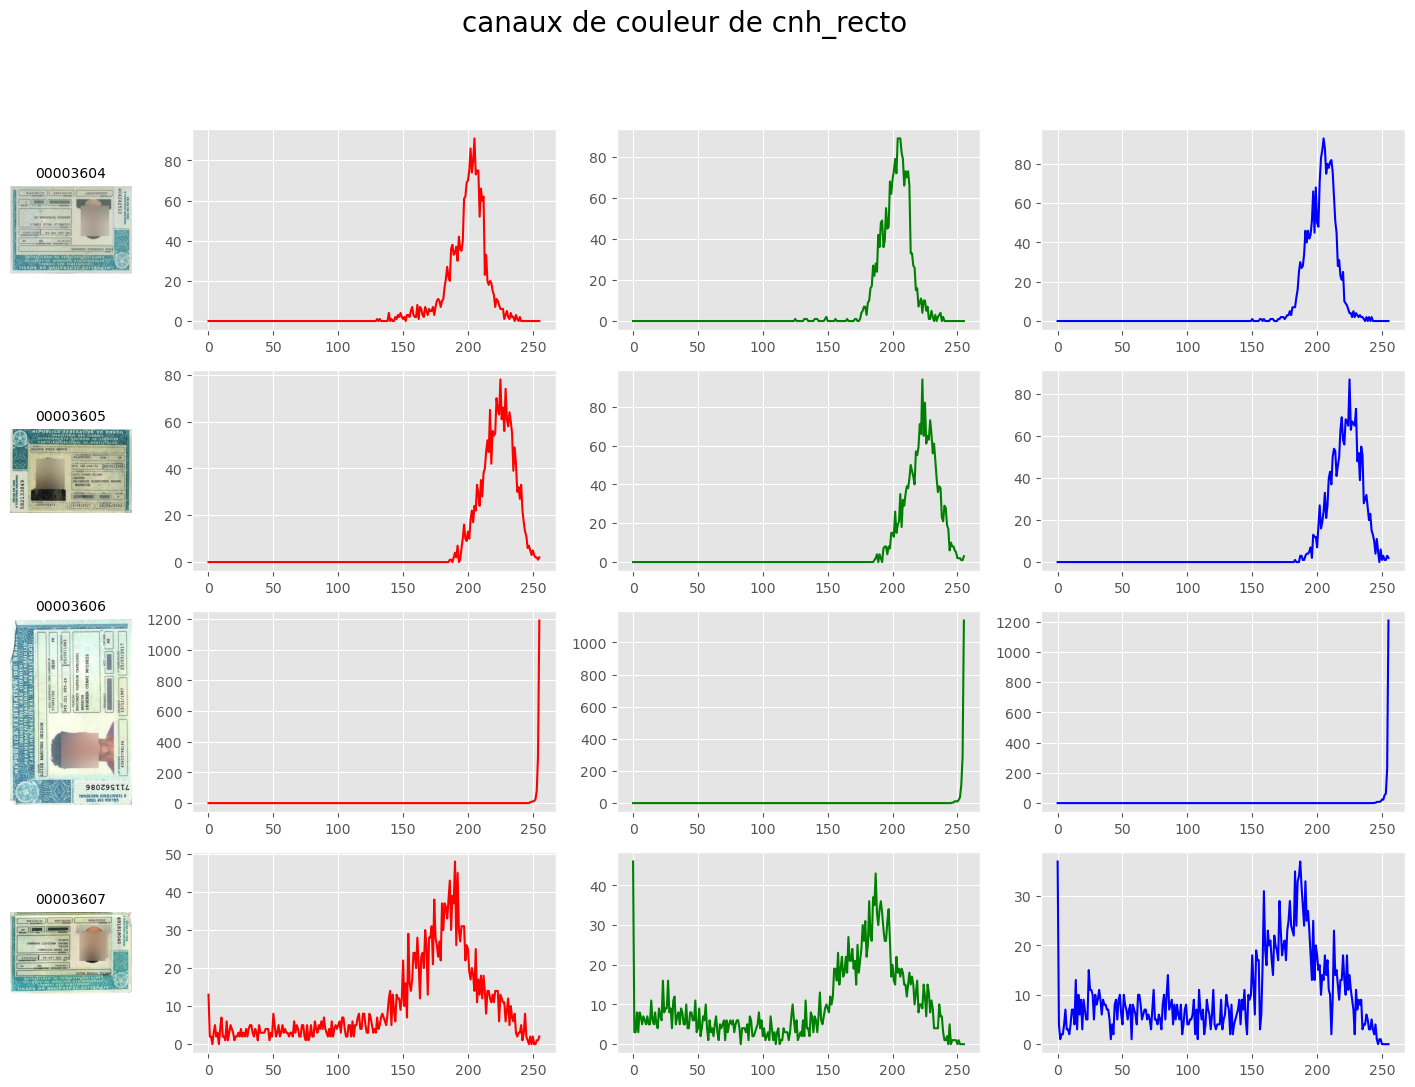

In [25]:
n = len(cnh_recto_v.keys())
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()
for key, value in cnh_recto_v.items():
    ax[0+(cont)].imshow(value['matrice']); 
    ax[0+(cont)].axis('off'); ax[0+(cont)].set_title(key,fontsize=10)

    ax[n+(cont)].plot(value['hist_red'], color='red');
    ax[n*2+(cont)].plot(value['hist_green'], color='green')
    ax[n*3+(cont)].plot(value['hist_blue'], color='blue')
    cont+=1
    
fig.suptitle('canaux de couleur de cnh_recto', fontsize=20)
plt.show()

## Conclusions

Dans ce test, il a été possible de vérifier que la plupart des documents ont une configuration différente dans leurs histogrammes de canaux de couleur. Cependant, comme il a également été possible de le voir, il existe des échantillons dans lesquels la numérisation du document est plus sombre que les autres, éloignant ainsi sa configuration d'histogramme de la configuration la plus représentative. 
Les documents ont des canaux de couleur différents, cependant, l'histogramme des photos à faible contraste diffère de celles à bon contraste, perturbant leur classement. 
Ainsi, pour continuer avec cette hypothèse de classification des documents, il est nécessaire de trouver un moyen d'identifier et d'améliorer/ajuster ces échantillons plus sombres.
Dans le prochain test `Hypothese1.1` , la possibilité d'améliorer le contraste de ces photos sera vérifiée pour permettre la classification des documents par des canaux de couleur.